In [51]:
%load_ext autoreload
%autoreload 2
import sys

sys.path.append('/home/iaamini/Documents/ML_practice/ML_fundamentals/ML_fundamentals/algorithms/')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [52]:
import numpy as np
from sklearn.datasets import make_classification
import logistic_regression as lg

In [53]:
def ls_armijo(X, y, w, f, fval0, pk, pente, alpha=1e-4, eta0=1, eta_min=0):
    
    w_new = w + eta0*pk
    fval_eta0 = f(w_new, X, y)
    
    if fval_eta0 <= fval0 + alpha*eta0*pente:
        print("returning eta0 at line 9")
        return eta0, fval_eta0
    # Sinon on calcul le minimiseur de l'interpolant quadratic
    eta1 = -(pente) * eta0**2 / 2.0 * (fval_eta0 - fval0 - pente * eta0)
    w_new = w + eta1*pk
    fval_eta1 = f(w_new, X, y)
    
    if fval_eta1 <= fval_eta0 + alpha*eta1*pente:
        print("returning eta1 at line 16")
        return eta1, fval_eta1
    i = 0
    while eta1 > eta_min:
        print(i)
        i += 1
        factor = 1 / eta1 - eta0
        
        coeff1 = fval_eta1 - fval0 - eta1 * pente
        coeff2 = fval_eta0 - fval0 - eta0 * pente

        a = (coeff1/(eta0**2) - coeff2/(eta1**2)) / (eta0 - eta1)
        b = (-eta1*coeff1/eta0**2)+eta0*coeff2/(eta1**2)/(eta0-eta1)

        # Calcul des coefficients du polynôme d'interpolation de degré 3 (Eq. 2.33)
#         a, b = factor * np.dot(mat1, mat2).flatten()
        if a != 0:
            delta = b**2 - 3*a*pente
            if delta >= 0:
                eta2 = (-b + np.sqrt(delta)) / 3*a
            else:
                raise ValueError("ls_armijo:problème d'interpolation")
        else:
            eta2 = eta1/2
            
        w_new= w + eta2*pk
        fval_eta2 = f(w_new, X, y)
        
        if fval_eta2 <= fval_eta0 + alpha*eta2*pente:
            print("returning eta2 at line 44")
            return eta2, fval_eta2
        if (eta1 - eta2) > eta1 / 2.0:
            eta2 = eta2 / 2.0
        eta0 = eta1
        eta1 = eta2
        fval_eta0 = fval_eta1
        fval_eta1 = fval_eta2
        
    return None, fval_eta1  
    

In [55]:
def line_search(X, y, w, f, pk, gfk, old_fval, alpha=1e-4, eta0=1, eta_min=0):
    """Temporary docstring for the line search
    X: array_like, matrix of data
    y: array_like, true labels
    w: array_like, weight vector
    f: callable, cost function
    pk: array_like, search direction
    gfk: array_like, gradient vector
    old_fval: float, old value of function
    alpha: float, constant coefficient
    eta0: float, int, initial step length
    eta_min: float, int minimum value for step length
    """
#     xk = np.atleast_1d(xk)
    fc = [0]

    def phi(eta1):
        fc[0] += 1
        return f(w + eta1*pk, *args)

    if old_fval is None:
        fval0 = phi(0.)
    else:
        fval0 = old_fval  # compute f(xk) -- done in past loop
    
    # Calcul de la pente
    pente = np.dot(pk, gfk)
    
    eta, fval1 = ls_armijo(X, y, w, f, fval0,pk, pente, alpha=alpha,
                            eta0=eta0)
    return eta, fval1

In [56]:
X, y = make_classification(n_samples=100, n_features=10)
w = np.ones(11) #np.random.random(X.shape[1]+1)
loss = lg.logistic_surrogate_loss(w, X, y)
g = lg.gradient_logistic_surrogate_loss(w, X, y)
p = -g

In [57]:
loss

0.25

In [58]:
line_search(X, y, w, f=lg.logistic_surrogate_loss, pk=p, gfk=g, old_fval=loss)

0
returning eta2 at line 44


/home/iaamini/Documents/ML_practice/ML_fundamentals/ML_fundamentals/algorithms/logistic_regression.py:35: RuntimeWarning: overflow encountered in exp
  np.exp(x) / (1.0 + np.exp(x)),
/home/iaamini/Documents/ML_practice/ML_fundamentals/ML_fundamentals/algorithms/logistic_regression.py:35: RuntimeWarning: invalid value encountered in true_divide
  np.exp(x) / (1.0 + np.exp(x)),
/home/iaamini/Documents/ML_practice/ML_fundamentals/ML_fundamentals/algorithms/logistic_regression.py:17: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-x))


(-2.665737595556895e+22, 0.25)

In [332]:
def test_func(x):
    return x**2
def test_func_gradient(x):
    return 2*x
x = np.linspace(-200, 200)
y = test_func(x)

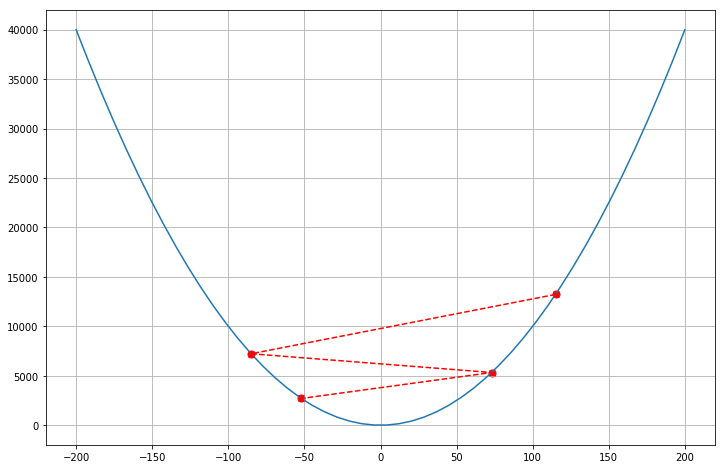

In [333]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plt.plot(x, y)
plt.grid(True)
plt.scatter([115, -85, 73, -52], [test_func(115), test_func(-85), test_func(73), test_func(-52)], c='r', s=50)
plt.plot([115, -85, 73, -52], [test_func(115), test_func(-85), test_func(73), test_func(-52)], 'xr--')

plt.show()

In [334]:
def gradient_descent(x0, f, g, learning_rate=0.05, T=1000):
    """
    X: array of values
    f: function to apply
    g: gradient of the function
    learning_rate: Learning rate for each step
    T: number of iteration
    """
    x = x0
    t = 0
    x_list = [x]
    while t <= T:
        x -= learning_rate * g(x)
        x_list.append(x)
        t +=1
    return x_list

In [335]:
test_result = gradient_descent(200, test_func, test_func_gradient, learning_rate=0.1, T=100)

In [336]:
test_result

[200,
 160.0,
 128.0,
 102.4,
 81.92,
 65.536,
 52.4288,
 41.94304,
 33.554432000000006,
 26.843545600000006,
 21.474836480000004,
 17.179869184000005,
 13.743895347200004,
 10.995116277760003,
 8.796093022208002,
 7.036874417766401,
 5.629499534213121,
 4.503599627370496,
 3.602879701896397,
 2.8823037615171176,
 2.305843009213694,
 1.8446744073709553,
 1.4757395258967643,
 1.1805916207174114,
 0.9444732965739291,
 0.7555786372591433,
 0.6044629098073147,
 0.48357032784585174,
 0.3868562622766814,
 0.30948500982134514,
 0.2475880078570761,
 0.1980704062856609,
 0.15845632502852872,
 0.12676506002282298,
 0.10141204801825839,
 0.08112963841460671,
 0.06490371073168537,
 0.0519229685853483,
 0.04153837486827864,
 0.03323069989462291,
 0.02658455991569833,
 0.021267647932558663,
 0.01701411834604693,
 0.013611294676837544,
 0.010889035741470035,
 0.008711228593176027,
 0.006968982874540822,
 0.005575186299632657,
 0.004460149039706126,
 0.0035681192317649005,
 0.0028544953854119206,
 0.0

In [111]:
# list(map(test_func_gradient, test_result))

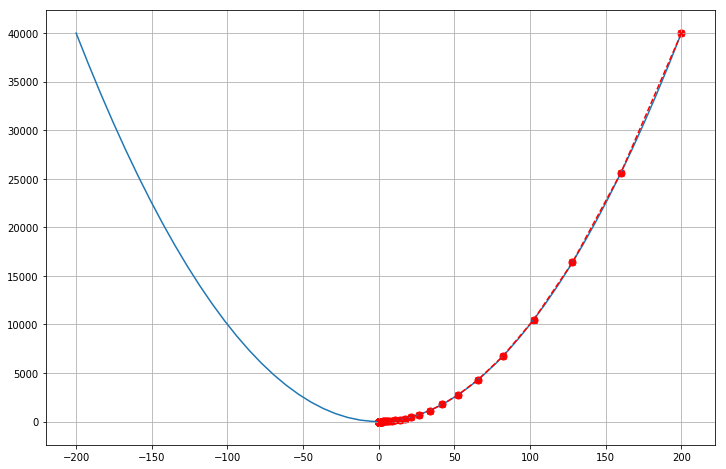

In [337]:
plt.figure(figsize=(12, 8))
plt.plot(x, y)
plt.grid(True)
plt.scatter(test_result, list(map(test_func, test_result)), c='r', s=50)
plt.plot(test_result, list(map(test_func, test_result)), 'xr--')

In [240]:
def quadratic_cost(pred, y):
    m = len(y)
    return (1/2*m)*np.mean((pred - y)**2)


# Creating the stochastic gradient descent function with 
def stochastic_gradient_descent(X, ytrue, T=1000, epsilon=0.1, learning_rate=0.5): 
    nrow = len(ytrue)
    w = np.zeros(X.shape[1])  # initialisation du vecteur w avec les w_i = 0
    t = 0
    m = len(ytrue)
    
    cost = np.inf
    costs = []
    w_list = []

    while (np.linalg.norm(np.gradient(cost)) > epsilon) or (t <= T):
        i = np.random.randint(nrow)
        y_t = ytrue[i] 
        X_t = X[i,:]
        prediction = np.dot(X_t.T, w)
        cost = np.sum(quadratic_cost(prediction, y_t))
        costs.append(cost)
        w_list.append(w)
        w = w - learning_rate * (1/m * X_t.T.dot(prediction - y_t))
        
        t += 1 
    return w, costs 
    

In [176]:
def predictions(X, w):
    return np.dot(X, w)

In [208]:
# creating a simple model
w = np.random.random(1)
w = w[:, np.newaxis]
X = np.random.rand(10)
X = X[:, np.newaxis]
y = X*w

In [241]:
w, costs = stochastic_gradient_descent(X, y, T=1000)

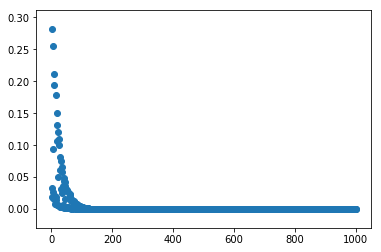

In [244]:
plt.scatter(np.arange(1, len(costs)+1), costs)

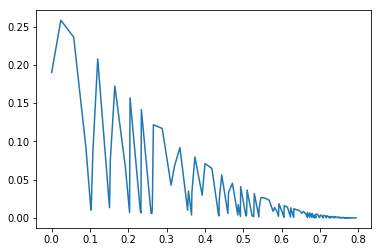

In [217]:
plt.plot(w_list, costs)

# Testing the line search

In [245]:
def predictions(X, w):
    w0 = w[-1]
    return np.dot(X, w[:-1]) + w0

def objective_function(w, X, y):
    pred = predictions(X, w)
    cost = quadratic_cost(pred, y)
    return cost

In [ ]:
def quadratic_cost(pred, y):
    m = len(y)
    return (1/2*m)*np.mean((pred - y)**2)

def grad_quadratic_w0(w0, y, X):
    return np.mean((pred - y)**2)

def grad_quadratic_w(w, y, X):
    return np.mean((pred - y)**2)*X

In [339]:
def gradient_logistic_surrogate_loss(w, X, y):
    """Calcul du vecteur gradient Eq. (3.17) avec le biais en plus
    Paramètres
    -----------
    X: matrix, or sparse array shape (n, d)
    y: array, shape (n,)
        True labels
    w: array, shape (d,)
        Weight vectors
    w0: scalar,
        bais
    Renvoie
    -------
    grad : array, shape (d,)
        Vecteur gradient de la fonction de coût logistique
    """
    n, d = X.shape
    g = np.zeros(d + 1)
    ps = np.dot(X, w[:-1]).sum() + w[-1]
    g[-1] = ((1 - lg.logistic(y * ps)) * y).sum()
    g[:d] = 1 - np.dot((lg.logistic(y * ps)) * y, X).sum()
    g /= n
    return g

In [340]:
X, y = make_classification(n_samples=100, n_features=10)
w = np.random.random(X.shape[1]+1)
loss = lg.logistic_surrogate_loss(w, X, y)
g = gradient_logistic_surrogate_loss(w, X, y)
p = -g

In [341]:
g

array([-0.11267009, -0.11267009, -0.11267009, -0.11267009, -0.11267009,
       -0.11267009, -0.11267009, -0.11267009, -0.11267009, -0.11267009,
        0.25091932])

In [ ]:
w

In [325]:
print(loss)

0.2550329123862916


In [326]:
line_search(X, y, w, f=lg.logistic_surrogate_loss, pk=p, gfk=g, old_fval=loss)

returning eta1 at line 16


(0.02904281154582845, 0.25503334104558034)

In [304]:
def gradient_logistic_surrogate_loss(w, X, y):
    """Calcul du vecteur gradient Eq. (3.17) avec le biais en plus
    Paramètres
    -----------
    X: matrix, or sparse array shape (n, d)
    y: array, shape (n,)
        True labels
    w: array, shape (d,)
        Weight vectors
    w0: scalar,
        bais
    Renvoie
    -------
    grad : array, shape (d,)
        Vecteur gradient de la fonction de coût logistique
    """
    n, d = X.shape
    g = np.zeros(d + 1)
    ps = np.dot(X, w[:-1]).sum() + w[-1]
    g[-1] = ((logistic(y * ps) - 1.0) * y).sum()
    g[:d] = np.dot((logistic(y * ps) - 1.0) * y, X).sum()
    g /= n
    return gdef line_search_armijo(f, xk, pk, gfk, old_fval, args=(), c1=1e-4, alpha0=1):
    """Minimize over alpha, the function ``f(xk+alpha pk)``.
    Parameters
    ----------
    f : callable
        Function to be minimized.
    xk : array_like
        Current point.
    pk : array_like
        Search direction.
    gfk : array_like
        Gradient of `f` at point `xk`.
    old_fval : float
        Value of `f` at point `xk`.
    args : tuple, optional
        Optional arguments.
    c1 : float, optional
        Value to control stopping criterion.
    alpha0 : scalar, optional
        Value of `alpha` at start of the optimization.
    Returns
    -------
    alpha
    f_count
    f_val_at_alpha
    Notes
    -----
    Uses the interpolation algorithm (Armijo backtracking) as suggested by
    Wright and Nocedal in 'Numerical Optimization', 1999, pg. 56-57
    """
    xk = np.atleast_1d(xk)
    fc = [0]

    def phi(alpha1):
        fc[0] += 1
        return f(xk + alpha1*pk, *args)

    if old_fval is None:
        phi0 = phi(0.)
    else:
        phi0 = old_fval  # compute f(xk) -- done in past loop

    derphi0 = np.dot(gfk, pk)
    alpha, phi1 = scalar_search_armijo(phi, phi0, derphi0, c1=c1,
                                       alpha0=alpha0)
    return alpha, fc[0], phi1


def scalar_search_armijo(phi, phi0, derphi0, c1=1e-4, alpha0=1, amin=0):
    """Minimize over alpha, the function ``phi(alpha)``.
    Uses the interpolation algorithm (Armijo backtracking) as suggested by
    Wright and Nocedal in 'Numerical Optimization', 1999, pg. 56-57
    alpha > 0 is assumed to be a descent direction.
    Returns
    -------
    alpha
    phi1
    """
    phi_a0 = phi(alpha0)
    if phi_a0 <= phi0 + c1*alpha0*derphi0:
        return alpha0, phi_a0

    # Otherwise compute the minimizer of a quadratic interpolant:

    alpha1 = -(derphi0) * alpha0**2 / 2.0 / (phi_a0 - phi0 - derphi0 * alpha0)
    phi_a1 = phi(alpha1)

    if (phi_a1 <= phi0 + c1*alpha1*derphi0):
        return alpha1, phi_a1

    # Otherwise loop with cubic interpolation until we find an alpha which
    # satisfies the first Wolfe condition (since we are backtracking, we will
    # assume that the value of alpha is not too small and satisfies the second
    # condition.

    while alpha1 > amin:       # we are assuming alpha>0 is a descent direction
        factor = alpha0**2 * alpha1**2 * (alpha1-alpha0)
        a = alpha0**2 * (phi_a1 - phi0 - derphi0*alpha1) - \
            alpha1**2 * (phi_a0 - phi0 - derphi0*alpha0)
        a = a / factor
        b = -alpha0**3 * (phi_a1 - phi0 - derphi0*alpha1) + \
            alpha1**3 * (phi_a0 - phi0 - derphi0*alpha0)
        b = b / factor

        alpha2 = (-b + np.sqrt(abs(b**2 - 3 * a * derphi0))) / (3.0*a)
        phi_a2 = phi(alpha2)

        if (phi_a2 <= phi0 + c1*alpha2*derphi0):
            return alpha2, phi_a2

        if (alpha1 - alpha2) > alpha1 / 2.0 or (1 - alpha2/alpha1) < 0.96:
            alpha2 = alpha1 / 2.0

        alpha0 = alpha1
        alpha1 = alpha2
        phi_a0 = phi_a1
        phi_a1 = phi_a2

    # Failed to find a suitable step length
    return None, phi_a1

In [327]:
line_search_armijo(f=logistic_surrogate_loss, xk=w, pk=p, gfk=g, old_fval=loss, args=(X, y))

(7.68736450093743e-13, 41, 0.2550329123862916)

In [347]:
import pandas as pd
marks = pd.read_csv("/home/iaamini/Documents/ML_practice/ML_fundamentals/marks.csv", header=None)
X = marks.iloc[:, :-1]
# y = target values, last column of the data frame
y = marks.iloc[:, -1]

In [348]:
w = np.random.random(X.shape[1] + 1)

In [357]:
lg.logistic(np.dot(X, w[:-1]) + w[-1])

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [375]:
def sigmoid(x):
    # Activation function used to map any real value between 0 and 1
    return 1 / (1 + np.exp(-x))

def net_input(theta, x):
    # Computes the weighted sum of inputs
    return np.dot(x, theta[:-1]) + theta[-1]

def probability(theta, x):
    # Returns the probability after passing through sigmoid
    return sigmoid(net_input(theta, x))

def cost_function(theta, x, y):
    # Computes the cost function for all the training samples
    m = x.shape[0]
    total_cost = -(1 / m) * np.sum(
        y * np.log(probability(theta, x)) + (1 - y) * np.log(
            1 - probability(theta, x)))
    return total_cost
          

In [376]:
cost_function(w, X, y)

/home/iaamini/Documents/ML_practice/ML_fundamentals/virtualenv/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log


inf

In [408]:
def logistic_surrogate_loss(w, X, y):
    """Calcul de la fonction de coût logistique
    Paramètres
    -----------
    X: matrix, or sparse array shape (n, d)
    y: array, shape (n,)
        True labels
    w: array, shape (d+1,)
        Weight vectors (the +1 is for the intercept)
    Renvoie
    -------
    loss : float,
        Valeur de la fonction de coût
    """
    n, d = X.shape
    ps = np.dot(X, w[:-1]).sum() + w[-1]
    S = lg.logistic(y*ps).sum() / n
    return S

def gradient_logistic_surrogate_loss(w, X, y):
    """Calcul du vecteur gradient Eq. (3.17) avec le biais en plus
    Paramètres
    -----------
    X: matrix, or sparse array shape (n, d)
    y: array, shape (n,)
        True labels
    w: array, shape (d,)
        Weight vectors
    w0: scalar,
        bais
    Renvoie
    -------
    grad : array, shape (d,)
        Vecteur gradient de la fonction de coût logistique
    """
    m, d = X.shape
    g = np.zeros(d + 1)
    ps = np.dot(X, w[:-1]).sum() + w[-1]
    g[-1] = ((lg.logistic(y * ps) -1) * y).sum()
    g[:d] = np.dot((lg.logistic(y * ps) - 1.) * y, X).sum()
    g /= m
    return g

def logistic_cost(w, X, y):
    m = X.shape[0]
    ps = np.dot(X, w[:-1]) + w[-1]
    log_ps = lg.logistic(ps)
    cost = ((y * np.log(log_ps) + (1- y)*np.log(1 - log_ps))).sum()
    return cost
                     
def gradient_logistic_cost(W, X, y):
    m = x.shape[0]
    # Calcul du produit scalaire
    ps = np.dot(X, w[:-1]) + w[-1]
    # Calcul de la transformation logistique de ps
    log_ps = lg.logistic(ps)
#     print(log_ps)
    return (1 / m) * (np.dot((log_ps - y), X))

In [409]:
def gradient_descent(x0, f, g, args=(), learning_rate=0.05, T=1000):
    """
    X: array of values
    f: function to apply
    g: gradient of the function
    learning_rate: Learning rate for each step
    T: number of iteration
    """
    x = x0
    t = 0
    x_list = [x]
    while t <= T:
        x -= learning_rate * g(x, *args)
        x_list.append(x)
        t +=1
    return x_list

In [410]:
gradient_logistic_cost(w, X, y)

array([41.62584088, 43.69631368])

In [411]:
gradient_descent(w[:-1], logistic_cost, gradient_logistic_cost, args=(X, y), T=15)

[array([ 3.69969149, -1.40597105]),
 array([ 3.69969149, -1.40597105]),
 array([ 3.69969149, -1.40597105]),
 array([ 3.69969149, -1.40597105]),
 array([ 3.69969149, -1.40597105]),
 array([ 3.69969149, -1.40597105]),
 array([ 3.69969149, -1.40597105]),
 array([ 3.69969149, -1.40597105]),
 array([ 3.69969149, -1.40597105]),
 array([ 3.69969149, -1.40597105]),
 array([ 3.69969149, -1.40597105]),
 array([ 3.69969149, -1.40597105]),
 array([ 3.69969149, -1.40597105]),
 array([ 3.69969149, -1.40597105]),
 array([ 3.69969149, -1.40597105]),
 array([ 3.69969149, -1.40597105]),
 array([ 3.69969149, -1.40597105])]